###### What a train test split is, how to use it to tune models using Python, and the bias-variance tradeoff.


In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load the Dataset
url='https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df=pd.read_csv(url)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Selecting Interested Columns 
columns=['bedrooms','bathrooms','sqft_lot','floors','price']
df=df.loc[:,columns]
df.head(10)

,bedrooms,bathrooms,sqft_lot,floors,price
0,3,1.00,5650,1.0,221900.0
1,3,2.25,7242,2.0,538000.0
2,2,1.00,10000,1.0,180000.0
3,4,3.00,5000,1.0,604000.0
4,3,2.00,8080,1.0,510000.0
5,4,4.50,101930,1.0,1225000.0
6,3,2.25,6819,2.0,257500.0
7,3,1.50,9711,1.0,291850.0
8,3,1.00,7470,1.0,229500.0
9,3,2.50,6560,2.0,323000.0


In [8]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'price'], dtype='object')

In [10]:
# Arrange data into Features and Target
features=['bedrooms', 'bathrooms', 'sqft_lot', 'floors']
X=df.loc[:,features]
y=df.loc[:,['price']]

In [11]:
# Splitting data into training set and testing set
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.75)

###### Creating and Training a Model with Scitkit-Learn

In [13]:
reg=DecisionTreeRegressor(max_depth=2, random_state=0)

In [14]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [15]:
# Predict labels of unseen (test)data
reg.predict(X_test[:10])

array([ 408789.63916463, 1039800.78308026,  408789.63916463,
        408789.63916463,  576038.21855817,  576038.21855817,
        576038.21855817,  576038.21855817,  576038.21855817,
       1039800.78308026])

In [16]:
X_test.head(1)

,bedrooms,bathrooms,sqft_lot,floors
17384,2,1.5,1650,3.0


In [18]:
# Predict 1 observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

array([408789.63916463])

###### Measuring Model Performance

While there are other ways of measuring model performance (root-mean-square error, mean absolute error, mean absolute error, etc), we are going to keep this simple and use R² otherwise known as the coefficient of determination as our metric. The best possible score is 1.0. A constant model that would always predict the mean value of price would get a R² score of 0.0 (interestingly it is possible to get a negative R² on the test set). The code below uses the trained model’s score method to return the R² of the model that was evaluated on the test set.

In [19]:
score = reg.score(X_test, y_test)
print(score)

0.31627728612240924


You might be wondering if our R² above is good for our model. In general the higher the R², the better the model fits the data. Determining whether a model is performing well can also depend on your field of study. Something harder to predict will in general have a lower R². My argument below is that for housing data, we should have a higher R² based solely on our data.

###### Tuning the max_depth of a Tree

In [20]:
max_depth_range = list(range(1, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
                            random_state = 0)
    reg.fit(X_train, y_train)   
    
    score = reg.score(X_test, y_test)
    r2_list.append(score)

The graph below shows that the best model R² is when the hyperparameter max_depth is equal to 5. This process of selecting the best model max_depth (max_depth = 5 in this case) among many other candidate models (with different max_depthvalues in this case) is called model selection.

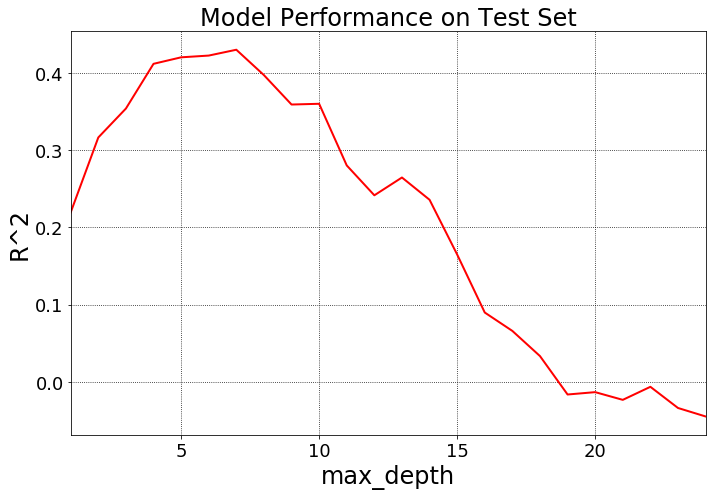

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

Note that the model above could have still been overfitted on the test set since the code changed max_depth repeatedly to achieve the best model. In other words, knowledge of the test set could have leaked into the model as the code iterated through 24 different values for max_depth (the length of max_depth_range is 24).

This would lessen the power of our evaluation metric R² as it would no longer be as strong an indicator of generalization performance. This is why in real life, we often have training, test, and validation sets when hyperparameter tuning.

###### The Bias-variance Tradeoff

In order to understand why max_depth of 5 was the “best model” for our data, take a look at the graph below which shows the model performance when tested on the training and test set.